# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,\
classification_report,roc_auc_score,roc_curve,precision_score,recall_score

# Loading Iris Dataset from Sklearn

In [2]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
df = data.frame

# pre processing

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

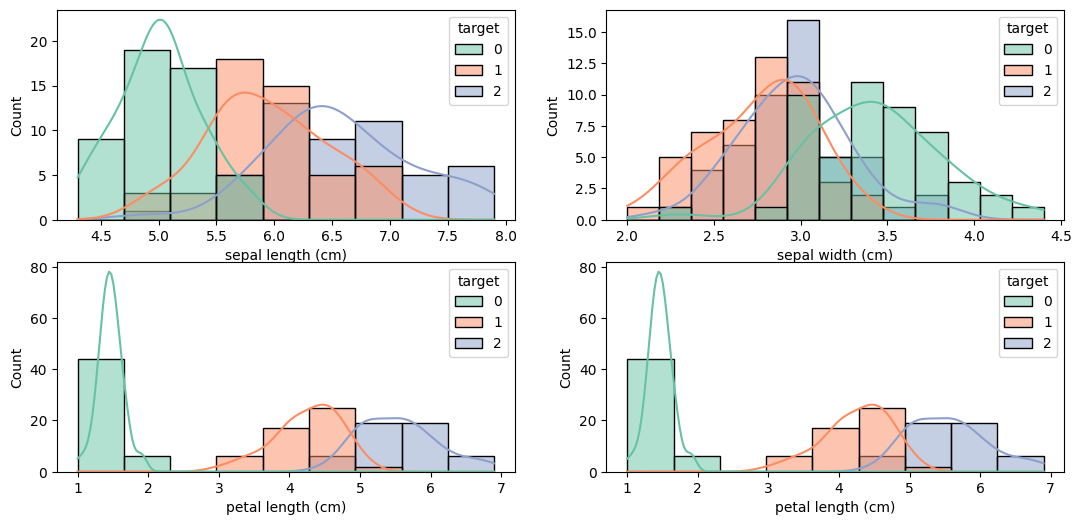

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,6))
sns.histplot(x = 'sepal length (cm)',data=df,hue = "target",kde=True,ax=axes[0,0],palette="Set2")
sns.histplot(x = 'sepal width (cm)',data=df,hue="target",kde=True,ax=axes[0,1],palette="Set2")
sns.histplot(x = 'petal length (cm)',data=df,hue="target",kde=True,ax=axes[1,0],palette="Set2")
sns.histplot(x = 'petal length (cm)',data=df,hue="target",kde=True,ax=axes[1,1],palette="Set2")
plt.show()

# splitting dataset for training and testing

In [21]:
X = df.drop("target",axis=1)
y = df["target"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 101,test_size=0.25)

# Decision tree Classifier

In [24]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf

DecisionTreeClassifier()

In [27]:
clf.criterion

'gini'

# Model Evaluation


In [28]:
y_pred = clf.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9736842105263158

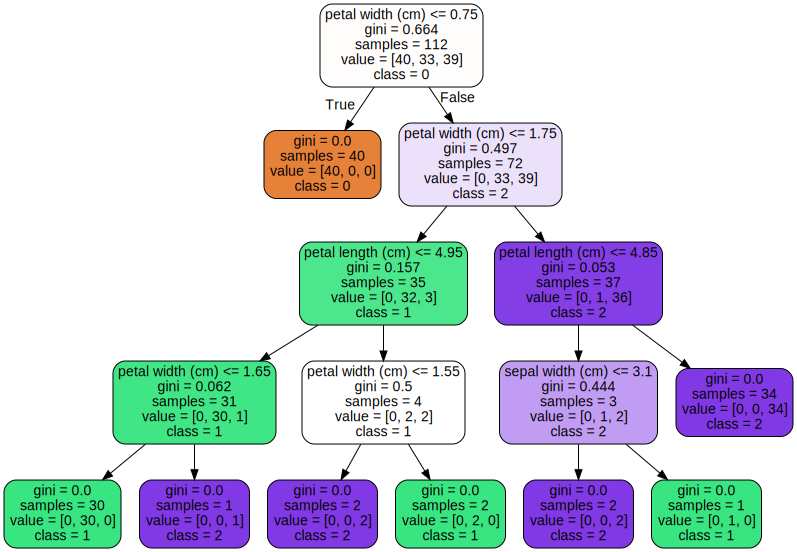

In [36]:
from sklearn.tree import export_graphviz
import graphviz
tree = export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    filled=True,
    rounded=True
)
graph = graphviz.Source(tree)
graph

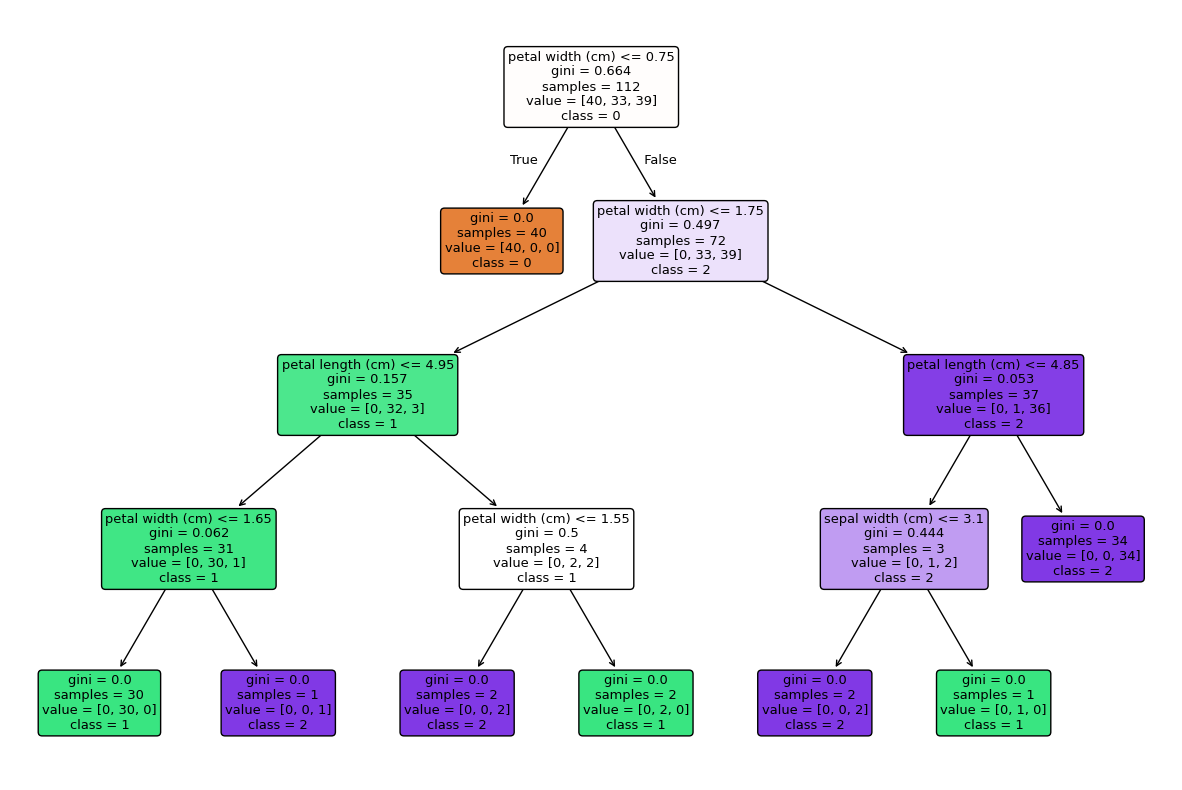

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['0','1','2'],
    filled=True,
    rounded=True
)
plt.show()

# Decision Tree with criterion = Entropy


In [43]:
cl = DecisionTreeClassifier(criterion='entropy')
cl.fit(x_train,y_train)
cl

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred = cl.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9736842105263158

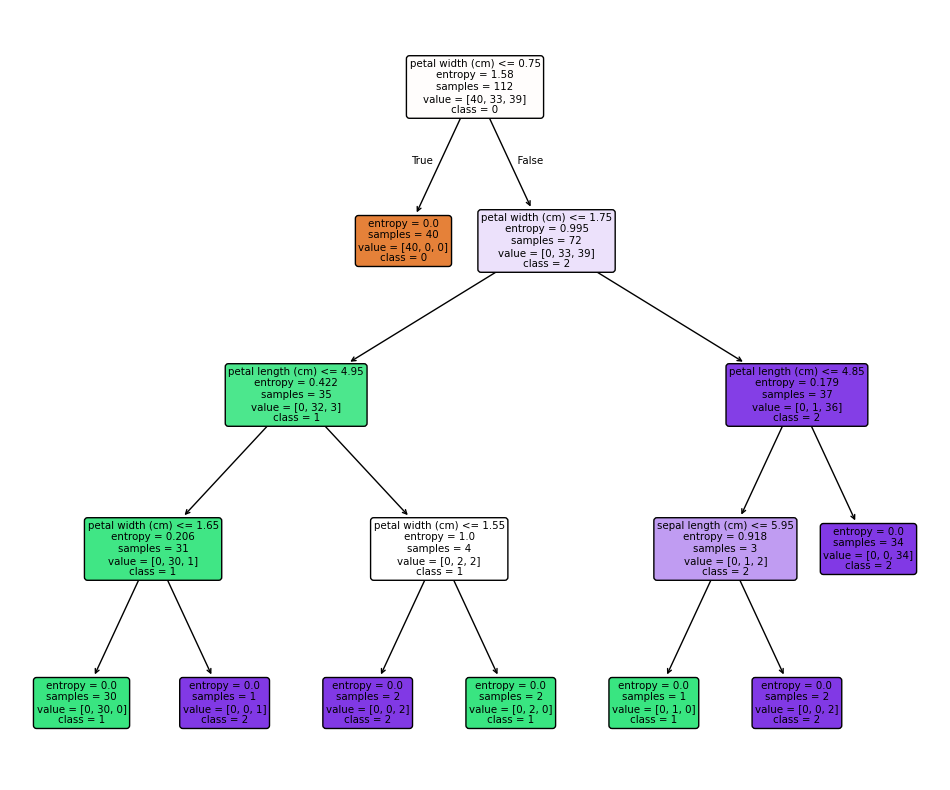

In [47]:
plt.figure(figsize=(12,10))
plot_tree(
    cl,
    feature_names=X.columns,
    class_names=['0','1','2'],
    filled = True,rounded=True
)
plt.show()
